In [2]:
from sklearn.datasets import make_circles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
X,y = make_circles(n_samples=1000, noise=0.08)

In [15]:
X

array([[-0.60047081,  0.52443603],
       [-0.64496277,  0.7463418 ],
       [-0.63187291, -0.36904729],
       ...,
       [-0.17756387,  0.95489496],
       [ 0.87774903, -0.01594223],
       [-0.24920008,  0.99894694]])

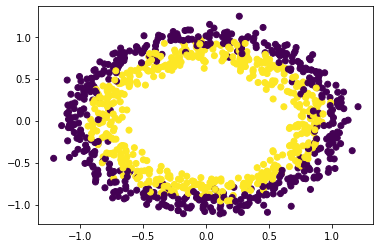

In [16]:
plt.scatter(X[:,0], X[:,1],c=y)

In [21]:
df = pd.DataFrame(columns=['X1','X2'], data=X)

In [22]:
df['class'] = y

In [23]:
df

,X1,X2,class
0,-0.600471,0.524436,1
1,-0.644963,0.746342,0
2,-0.631873,-0.369047,1
3,0.375295,0.607144,1
4,1.128824,0.005871,0
...,...,...,...
995,-0.474311,-0.820406,0
996,0.022835,-0.913908,0
997,-0.177564,0.954895,0
998,0.877749,-0.015942,1


In [25]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [26]:
model = Sequential()

In [27]:
# Without Batch Normalization

model.add(Dense(4, activation='relu',input_dim=2))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
logs = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 0.7103 - accuracy: 0.4812 - val_loss: 0.7177 - val_accuracy: 0.4850
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7051 - accuracy: 0.4913 - val_loss: 0.7118 - val_accuracy: 0.4600
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.4875 - val_loss: 0.7065 - val_accuracy: 0.5050
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.4850 - val_loss: 0.7037 - val_accuracy: 0.5050
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.4837 - val_loss: 0.7018 - val_accuracy: 0.4950
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.4863 - val_loss: 0.7001 - val_accuracy: 0.4950
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.4888 - val_loss: 0.6988 - val_accuracy: 0.4950
Epoch 8/100


In [31]:
# With Batch Normalization
model = Sequential()

model.add(Dense(4, activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 12        
                                                                 
 batch_normalization_2 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 batch_normalization_3 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 69
Trainable params: 53
Non-trainable pa

In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
logs_with_normalization = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 0.8034 - accuracy: 0.4613 - val_loss: 0.6997 - val_accuracy: 0.5350
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7748 - accuracy: 0.4812 - val_loss: 0.6970 - val_accuracy: 0.4650
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7570 - accuracy: 0.4625 - val_loss: 0.6947 - val_accuracy: 0.4550
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7427 - accuracy: 0.4775 - val_loss: 0.6928 - val_accuracy: 0.5250
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7327 - accuracy: 0.4988 - val_loss: 0.6926 - val_accuracy: 0.5100
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7253 - accuracy: 0.4900 - val_loss: 0.6920 - val_accuracy: 0.4450
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7184 - accuracy: 0.4888 - val_loss: 0.6914 - val_accuracy: 0.4500
Epoch 8/100


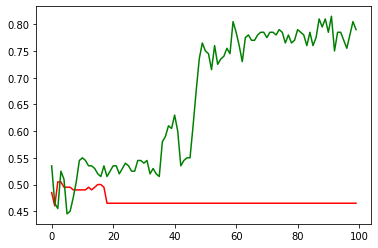

In [34]:
# Big difference in accuracy when we use Batch Normalization
plt.plot(logs.history['val_accuracy'], color='red')
plt.plot(logs_with_normalization.history['val_accuracy'], color='green')

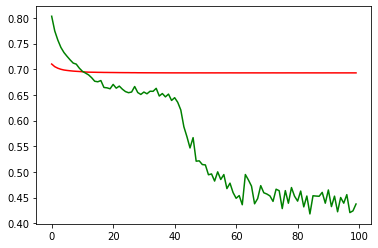

In [35]:
plt.plot(logs.history['loss'], color='red')
plt.plot(logs_with_normalization.history['loss'], color='green')